In [1]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 28 epochs
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

batch_size = 128
num_classes = 10
epochs = 200

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    
# show the plot
pyplot.show()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15356718807057506252
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11987822183
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7629643111121329965
physical_device_desc: "device: 0, name: GeForce GTX TITAN X, pci bus id: 0000:04:00.0, compute capability: 5.2"
]


<Figure size 640x480 with 9 Axes>

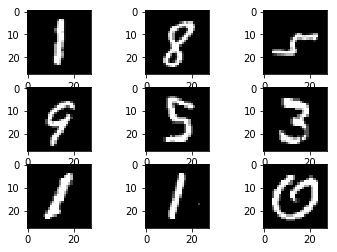

In [2]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

nb_train_samples = x_train.shape[0]
nb_test_samples = x_test.shape[0]

# define data preparation
train_datagen_rand = ImageDataGenerator(
    rescale=1. / 255.,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2 )

train_datagen = ImageDataGenerator( rescale=1. / 255. )

test_datagen = ImageDataGenerator(
    rescale = 1./255.)

# fit parameters from data
train_datagen.fit(x_train)
test_datagen.fit(x_test)
# configure batch size and retrieve one batch of images
for x_batch, y_batch in train_datagen.flow(x_train, y_train, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(x_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break
    

In [3]:
batch_size = 128
epochs = 30

# convert class vectors to binary class matrices
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
x_test_norm = x_test/255.
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)

train_generator = train_datagen.flow(
    x_train, y_train_onehot, 
    batch_size=batch_size)

validation_generator = test_datagen.flow(
    x_test, y_test_onehot, 
    batch_size=batch_size,
    shuffle=False)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit_generator(train_generator,
                    steps_per_epoch=nb_train_samples // batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=validation_generator,
          validation_steps=nb_train_samples // batch_size,
                    initial_epoch = 0
         )


Epoch 1/30
468/468 [==============================] - 11s 23ms/step - loss: 0.2612 - acc: 0.9192 - val_loss: 0.0567 - val_acc: 0.9823
Epoch 2/30
468/468 [==============================] - 8s 18ms/step - loss: 0.0911 - acc: 0.9724 - val_loss: 0.0400 - val_acc: 0.9864
Epoch 3/30
468/468 [==============================] - 9s 18ms/step - loss: 0.0660 - acc: 0.9801 - val_loss: 0.0317 - val_acc: 0.9898
Epoch 4/30
468/468 [==============================] - 8s 18ms/step - loss: 0.0536 - acc: 0.9843 - val_loss: 0.0282 - val_acc: 0.9896
Epoch 5/30
468/468 [==============================] - 8s 18ms/step - loss: 0.0472 - acc: 0.9858 - val_loss: 0.0280 - val_acc: 0.9904
Epoch 6/30
468/468 [==============================] - 9s 18ms/step - loss: 0.0414 - acc: 0.9876 - val_loss: 0.0288 - val_acc: 0.9904
Epoch 7/30
468/468 [==============================] - 8s 18ms/step - loss: 0.0360 - acc: 0.9892 - val_loss: 0.0268 - val_acc: 0.9908
Epoch 8/30
468/468 [==============================] - 8s 18ms/step -

In [4]:
score = model.evaluate_generator(validation_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
res = model.predict_generator(validation_generator)

Test loss: 0.0289896857076325
Test accuracy: 0.9919


In [7]:
import numpy as np
tt = np.array([0]*10)
tf = np.array([0]*10)
ft = np.array([0]*10)
ff = np.array([0]*10)
pred= np.argmax(res,axis=1)
for i in range(len(y_test)):
    # print(str(pred[i])+"/"+str(validation_generator.classes[i]))
    for j in range(10):
        actc = str(j)
        if str(y_test[i])==actc:
            if str(pred[i]) == actc:
                tt[j]+=1
            else:
                tf[j]+=1
        else:
            if str(pred[i]) == actc:
                ft[j]+=1
            else:
                ff[j]+=1

In [9]:
from sklearn.metrics import *
print(pred )
cnf_matrix = confusion_matrix(y_test, pred)

[7 2 1 ... 4 5 6]


Normalized confusion matrix
[[9.97959184e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 1.02040816e-03 1.02040816e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 9.96475771e-01 8.81057269e-04 0.00000000e+00
  0.00000000e+00 8.81057269e-04 1.76211454e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.68992248e-04 9.68992248e-04 9.94186047e-01 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 3.87596899e-03
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.97029703e-03 9.92079208e-01
  0.00000000e+00 2.97029703e-03 0.00000000e+00 0.00000000e+00
  1.98019802e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.97963340e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 2.03665988e-03]
 [2.24215247e-03 0.00000000e+00 0.00000000e+00 4.48430493e-03
  0.00000000e+00 9.88789238e-01 4.48430493e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.17536534e-03 2.08768267e-0

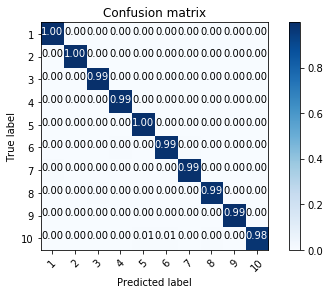

In [13]:
import sys
sys.path.append("../utils")
from confusion import *
plot_confusion_matrix(cnf_matrix, [str(i+1) for i in range(10)],normalize=True)